In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../EDA/result3.csv')
df['location_count'] = df['location'].apply(lambda x: len(eval(x)))
df.drop('location',axis=1, inplace=True)
df

,programming language,tiobe index ratings,job amount,average salary,linkedin skill,avg wiki views (monthly),github user count,average search count,stack overflow count,location_count
0,Java,10.51,728,6.153528e+06,103000,3925.598214,6800,28.133930,2531,12
1,JavaScript,3.54,1111,6.168157e+06,118000,5276.794643,11400,15.482143,4633,12
2,Dart,0.56,32,6.250161e+06,945,52.953846,877,37.000000,963,6
3,Node.js,0.00,450,5.596209e+06,34000,662.803571,-1,2.633929,2207,8
4,PHP,1.21,505,5.762279e+06,123000,4083.750000,8600,26.616071,3147,11
...,...,...,...,...,...,...,...,...,...,...
170,Dc,0.00,1,5.592859e+06,0,-1.000000,-1,0.000000,0,1
171,VBScript,0.33,2,3.327448e+06,692,175.750000,-1,21.366070,0,1
172,CORAL,0.00,1,3.244448e+06,0,-1.000000,-1,0.000000,0,1
173,UniVerse,0.00,1,1.520833e+06,0,-1.000000,-1,0.000000,0,1


In [3]:
# standardize the data
scaler = StandardScaler()
df[['tiobe index ratings_T','job amount_T','average salary_T','linkedin skill_T',
    	'avg wiki views (monthly)_T','github user count_T','average search count_T',
        'stack overflow count_T','location_count_T']] = scaler.fit_transform(df[['tiobe index ratings','job amount',
        'average salary','linkedin skill',
    	'avg wiki views (monthly)','github user count','average search count',
        'stack overflow count','location_count']])

features_scaled = df[['tiobe index ratings_T','job amount_T','average salary_T','linkedin skill_T',
    	'avg wiki views (monthly)_T','github user count_T','average search count_T',
        'stack overflow count_T','location_count_T']]

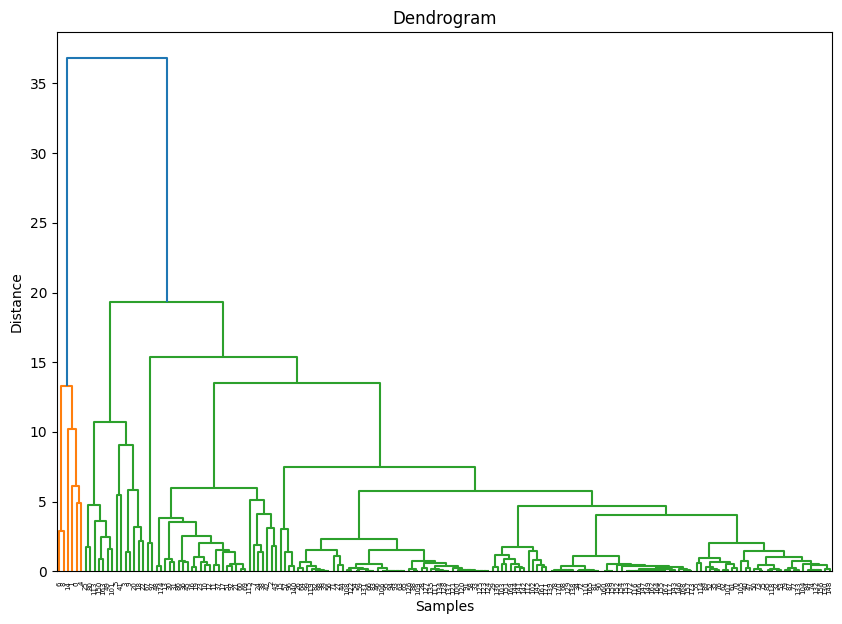

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical/agglomerative clustering
linked = linkage(features_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

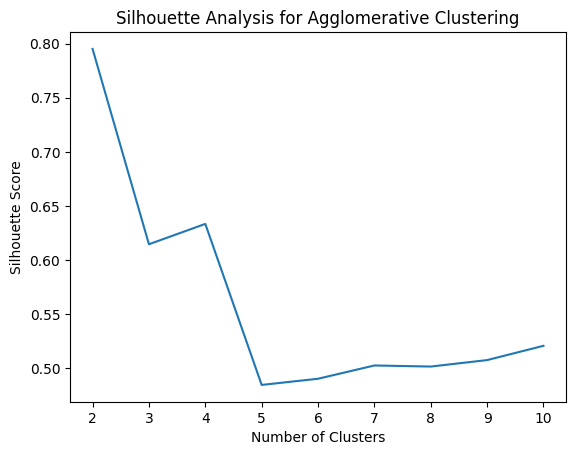

Optimal number of clusters: 2 with silhouette score of 0.80


In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

best_score = -1
best_n_clusters = 0
scores = []

for n_clusters in range(2, 11):  # Try 2 to 10 clusters
    agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg_cluster.fit_predict(features_scaled)
    score = silhouette_score(features_scaled, labels)
    scores.append(score)
    
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters

plt.plot(range(2, 11), scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Agglomerative Clustering")
plt.show()

print(f"Optimal number of clusters: {best_n_clusters} with silhouette score of {best_score:.2f}")


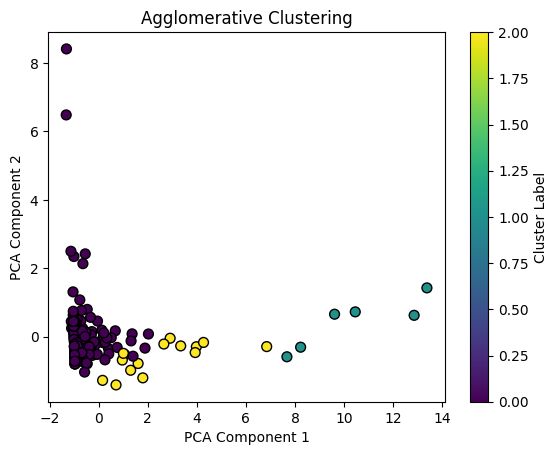

In [6]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Perform Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)  # Adjust n_clusters as needed
agg_labels = agg_cluster.fit_predict(features_scaled)

# Add labels to the DataFrame
df['agg_cluster'] = agg_labels

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)

# Plotting results
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=agg_labels, cmap='viridis', s=50, edgecolor='k')
plt.title("Agglomerative Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()


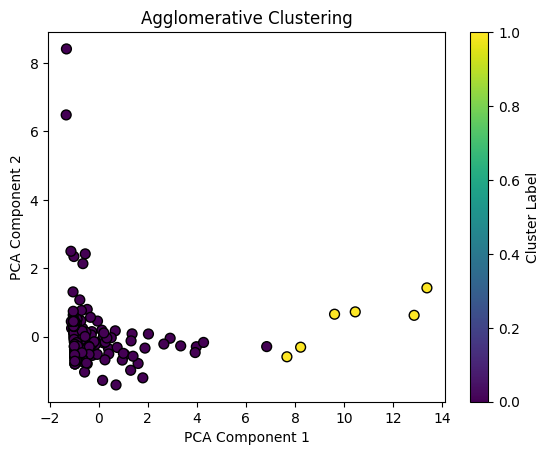

In [7]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Perform Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=2)  # Adjust n_clusters as needed
agg_labels = agg_cluster.fit_predict(features_scaled)

# Add labels to the DataFrame
df['agg_cluster'] = agg_labels

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)

# Plotting results
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=agg_labels, cmap='viridis', s=50, edgecolor='k')
plt.title("Agglomerative Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()
